# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [2]:
# Overview:
# Step 1: Read and understand the data
# Step 2: Data Exploration - cleaning of data
# Step 3: Data Visualization
# Step 4: Data Preparation
# Step 5: Data Standardization
# Step 6: Test-Train Split
# Step 7: Model Building
# Step 8: Final Recommendation

In [1]:
# Importing all important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Step 1: Read and understand the data

In [3]:
# loading the data

lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# lets find the no. of cols and rows in the dataset

lead_data.shape

(9240, 37)

In [5]:
# finding the summary of the dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

# Step 2: Data Exploration - cleaning of data

### Storing numerical and categorical varibles


In [6]:
# storing variables in different dataframe will help us perform necessary steps

In [7]:
# storing numerical variables

lead_num_li = lead_data.select_dtypes(include=np.number)
lead_num_li.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


In [8]:
# storing categorical variables

lead_cat_li = lead_data.select_dtypes(exclude=np.number)
lead_cat_li.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened


### Cleaning of numerical variables

In [9]:
# print no.of columns with missing values in numerical variables

num_null = (round(100*(lead_num_li.isnull().sum())/(len(lead_data)),2)).sort_values(ascending=False)
num_null 

Asymmetrique Profile Score     45.65
Asymmetrique Activity Score    45.65
Page Views Per Visit            1.48
TotalVisits                     1.48
Total Time Spent on Website     0.00
Converted                       0.00
Lead Number                     0.00
dtype: float64

### Imputing or removing missing values in numerical variables

In [10]:
# we shall first consider the columns with high missing values

# calculating mode of the below column
lead_data['Asymmetrique Profile Score'].mode()

# 15 is the mode
# let's impute null values with 15
lead_data['Asymmetrique Profile Score'] = lead_data['Asymmetrique Profile Score'].fillna(lead_data['Asymmetrique Profile Score'].mode().iloc[0])

lead_data['Asymmetrique Profile Score'].isnull().sum()

0

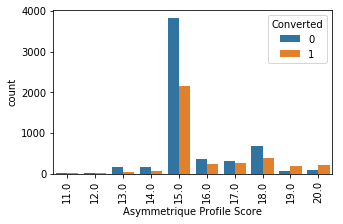

In [11]:
# lets visualize conversion rate against 'Asymmetrique Profile Score' column
plt.figure(figsize=(5,3))
sns.countplot(x='Asymmetrique Profile Score', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
# calculating mode of the below column
lead_data['Asymmetrique Activity Score'].mode()

# 14 is the mode
# let's impute null values with 14
lead_data['Asymmetrique Activity Score'] = lead_data['Asymmetrique Activity Score'].fillna(lead_data['Asymmetrique Activity Score'].mode().iloc[0])


lead_data['Asymmetrique Activity Score'].isnull().sum()

0

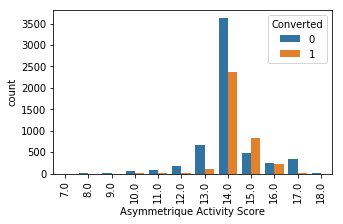

In [13]:
# lets visualize conversion rate against 'Asymmetrique Activity Score' column
plt.figure(figsize=(5,3))
sns.countplot(x='Asymmetrique Activity Score', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
# col 'Page Views Per Visit' & col 'TotalVisits' means the same thing i.e. number of visits by the customer.
# we will consider only one col here and drop the other

lead_data = lead_data.drop(['Page Views Per Visit'], axis=1)

lead_data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [14]:
# now lets check for the null values again

(round(100*(lead_data.isnull().sum())/(len(lead_data)),2)).sort_values(ascending=False)


Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Lead Numbe

All null values for numeric columns have been cleared. We shall continue with our cleaning of categorical variables

### Cleaning of categorical variables

In this section we will be removing lot of values (in visualization - where the blue lines are longer) that are insignificant to our analysis. We will impute that as 'Others' or appropriate alternate value. Else dummy variables will be created for these values also which are not of much use to us.

In [17]:
# reading the dataframe again for our understanding

lead_cat_li.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened


In [15]:
# print no.of columns with missing values & 'Select' 
# 'select' is a value that suggests that customers did not select any option given in the drop down. which is just like null values.

cat_null = (round((((lead_cat_li.isnull().sum()) | ((lead_cat_li == 'Select').sum())) / (len(lead_data))*100),2)).sort_values(ascending=False)
cat_null [cat_null>0]

How did you hear about X Education               76.87
Lead Profile                                     74.02
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             38.24
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Specialization                                   21.10
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

### Imputing or removing missing values in categorical variables

Here we will drop 2 columns straight away since it has more than 70% null values and 'Select' values


In [16]:
# dropping the columns with more than 70% null values
lead_data = lead_data.drop(['How did you hear about X Education','Lead Profile'], axis=1)


In [17]:
# lets first consider 'Lead Quality' column 
lead_data['Lead Quality'].value_counts()

# We will not remove the column or ignore the missing values.
# we do not want to skew the data by imputing null values as mean, mode, etc. 
# so we will here consider null values as 'Unknown' 
# lets impute 'Na' with Unknown
lead_data['Lead Quality'].fillna('Unknown', inplace=True) 

# Values like 'Not Sure', 'Worst' where the blue lines are longer, are insignificant for our analysis. 
# We will impute that as 'Unknown' or else dummy variables will be created for these values also which are not of much use to us.

lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(['Not Sure', 'Worst'], 'Unknown')


# lets check for null values
lead_data['Lead Quality'].isnull().sum()

0

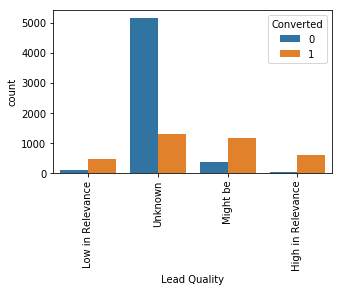

In [21]:
# lets visualize conversion rate against 'Lead Quality' column
plt.figure(figsize=(5,3))
sns.countplot(x='Lead Quality', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

So, here the conversion rate is higher for clients who were marked as 'Might be' or 'High in Relevance'.

In [18]:
# lets find the unique values of this series
lead_data['Asymmetrique Profile Index'].value_counts()

# just like 'Lead Quality', we will consider null values as 'others' here as well.
# lets impute 'Na' with Others
lead_data['Asymmetrique Profile Index'].fillna('Others', inplace=True) 
# 
lead_data['Asymmetrique Profile Index'].isnull().sum()

0

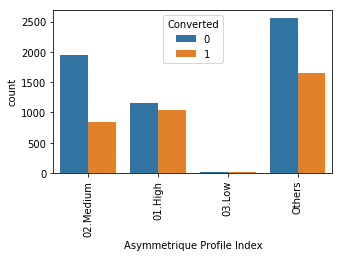

In [19]:
# lets visualize conversion rate against 'Asymmetrique Profile Index' column 
plt.figure(figsize=(5,3))
sns.countplot(x='Asymmetrique Profile Index', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

There is not much ineference drawn from the above graph w.r.t conversion rate.

In [20]:
# lets find the unique values of this series
lead_data['Asymmetrique Activity Index'].value_counts()

# just like 'Lead Quality', we will consider null values as 'others' here as well.
# lets impute 'Na' with Others
lead_data['Asymmetrique Activity Index'].fillna('Others', inplace=True) 
# 
lead_data['Asymmetrique Activity Index'].isnull().sum()

0

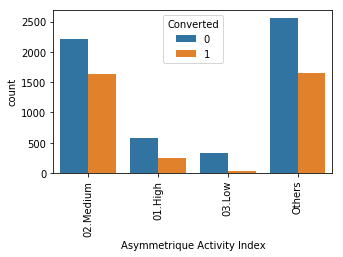

In [25]:
# lets visualize conversion rate against 'Asymmetrique Activity Index' column 
plt.figure(figsize=(5,3))
sns.countplot(x='Asymmetrique Activity Index', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

Not much inference drawn from the above graph w.r.t conversion rate.

In [21]:
# lets see the values under 'City'
lead_data['City'].value_counts()

# we will take 2 actions here - impute 'select' and impute null values.

# 'select' is a value that suggests that customers did not select any cities. which is just like null values.
# we will impute this 'select' with 'Other', some common location and that will not disturb our analysis.
lead_data['City'] = lead_data['City'].replace(to_replace='Select', value= 'Other' )

# validate the changes
lead_data['City'].value_counts()

# we will now impute the null values with the most frequent value 'Mumbai' and replace that with same
lead_data['City'].fillna('Mumbai', inplace=True) 

# validate the changes
# check for null values
lead_data['City'].isnull().sum()

0

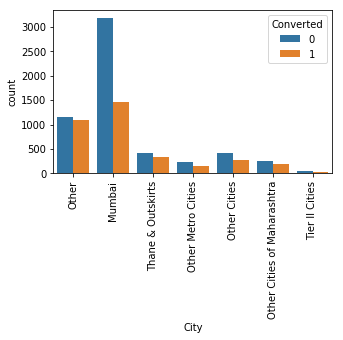

In [22]:
# lets visualize conversion rate against 'City' column 
plt.figure(figsize=(5,3))
sns.countplot(x='City', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
# lets find the unique values of this series
lead_data['Tags'].value_counts()

# lets replace the insignificant values like 'Still Thinking', 'opp hangup', etc to 'Others' 
# else dummy variables will be created for these values too.
# lets replace the insignificant values to 'Others'
lead_data['Tags'] = lead_data['Tags'].replace(['Interested in other courses','Ringing','switched off','Already a student','Graduation in progress','Not doing further education','invalid number','In confusion whether part time or DLP', 'in touch with EINS', 
                                      'number not provided', 'opp hangup', 'Still Thinking', 'Lost to Others', 'wrong number given','Interested  in full time MBA',
                                      'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch', 'Diploma holder (Not Eligible)',
                                      'Recognition issue (DEC approval)', 'Want to take admission but has financial problems', 
                                      'University not recognized'], 'Others')
# lets check the column now
lead_data['Tags'].value_counts()

# just like 'Lead Quality', we will consider null values as 'others' here as well.
# lets impute 'Na' with Others
lead_data['Tags'].fillna('Others', inplace=True) 
# check for null values
lead_data['Tags'].isnull().sum()

0

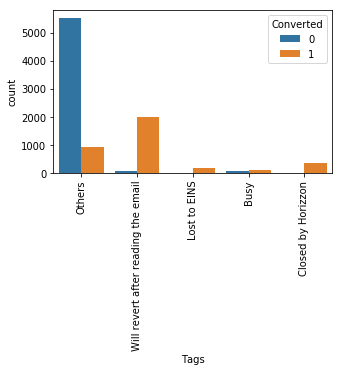

In [29]:
# lets visualize conversion rate against 'Tags' column 
plt.figure(figsize=(5,3))
sns.countplot(x='Tags', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

So, conversion is higher for tags:

* Will revert after reading the email
* Lost to EINS
* Closed by Horizon

In [24]:
# lets find the unique values of this series
lead_data['What matters most to you in choosing a course'].value_counts()

# just like 'Lead Quality', we will consider null values as 'others' here as well.
# lets impute 'Na' with Others
lead_data['What matters most to you in choosing a course'].fillna('Others', inplace=True) 

# lets replace the insignificant values like 'Other', 'Flexibility & Convenience' to 'Others' 
# else dummy variables will be created for these values too.
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(['Other', 'Flexibility & Convenience'], 'Others')

# check for null values  
lead_data['What matters most to you in choosing a course'].isnull().sum()

0

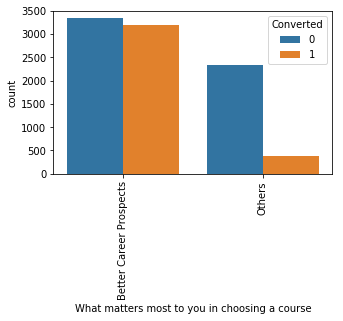

In [31]:
# lets visualize conversion rate against 'What matters most to you in choosing a course' column 
plt.figure(figsize=(5,3))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

People generally give prime importance to better career prospects while choosing a course.

In [25]:
# lets find the unique values of this series
lead_data['What is your current occupation'].value_counts()

# just like 'Lead Quality', we will consider null values as 'others' here as well.
# lets impute 'Na' with Others
lead_data['What is your current occupation'].fillna('Others', inplace=True) 

# lets replace the insignificant values like 'Other' to 'Others' 
# else dummy variables will be created for these values too.
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(['Other'], 'Others')

# check for null values  
lead_data['What is your current occupation'].isnull().sum()


0

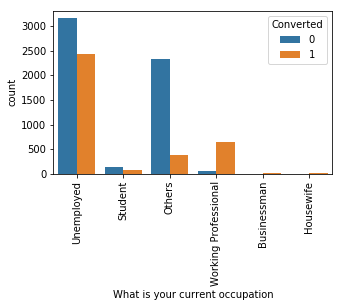

In [33]:
# lets visualize the column
plt.figure(figsize=(5,3))
sns.countplot(x='What is your current occupation', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

Though maximum number of leads come in the unemployed category, conversion rate is higher amongst working professionals.

In [26]:
# lets find the unique values of this series
lead_data['Country'].value_counts()

# just like 'Lead Quality', we will consider null values as 'others' here as well.
# lets impute 'Na' with Others
lead_data['Country'].fillna('Others', inplace=True) 

# lets replace the insignificant values to 'Others' 
# else dummy variables will be created for these values too.
lead_data['Country'] = lead_data['Country'].replace(['unknown', 'Bahrain','Hong Kong','France','Oman','Nigeria','Canada',
                                                    'Kuwait','South Africa','Germany','Sweden','Uganda','Netherlands',
                                                    'Philippines','Italy','Belgium','China','Ghana','Bangladesh',
                                                    'Sri Lanka','Indonesia','Denmark','Russia','Kenya','Vietnam','Malaysia',
                                                     'Switzerland','Liberia','Tanzania','Asia/Pacific Region','Australia',
                                                    'Qatar','Singapore','Saudi Arabia','United Kingdom'], 'Others')

# check for null values  
lead_data['Country'].isnull().sum()

0

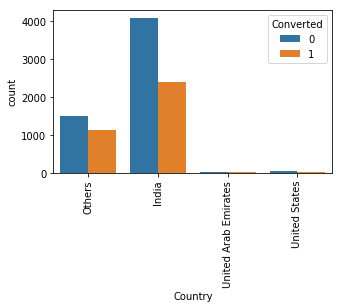

In [35]:
# lets visualize the column again
plt.figure(figsize=(5,3))
sns.countplot(x='Country', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# lets find the unique values of this series
lead_data['Specialization'].value_counts()

# 'select' is a value that suggests that customers did not select any specialization. which is just like null values.
# we will impute this 'select' and null values as 'Others' and that will not disturb our analysis.
# Also lets replace the insignificant values to 'Others'  else dummy variables will be created for these values too.
lead_data['Specialization'] = lead_data['Specialization'].replace(['Select','E-Business','Services Excellence'],'Others' )

# validate the changes
lead_data['Specialization'].value_counts()

# we will not impute the null values and replace that with same 'India'
lead_data['Specialization'].fillna('Others', inplace=True) 

# validate the changes
# check for null values
lead_data['Specialization'].isnull().sum()

0

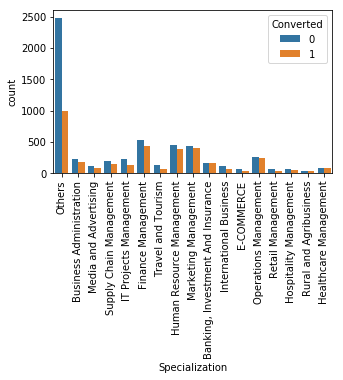

In [37]:
# lets visualize the column again
plt.figure(figsize=(5,3))
sns.countplot(x='Specialization', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

Most of the people have not mentioned the specialization.

In [28]:
# lets find the unique values of this series
lead_data['Last Activity'].value_counts()

# Also lets replace the insignificant values to 'Others'  else dummy variables will be created for these values too.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Olark Chat Conversation','Email Bounced','Converted to Lead',
                                                                'Email Received','Unsubscribed','Had a Phone Conversation',
                                                                'Page Visited on Website','Unreachable','Email Link Clicked',
                                                                'Form Submitted on Website','Approached upfront'],'Others' )

# validate the changes
lead_data['Last Activity'].value_counts()

# we will not impute the null values and replace that with same 'Others'
lead_data['Last Activity'].fillna('Others', inplace=True) 

# validate the changes
# check for null values
lead_data['Last Activity'].isnull().sum()

0

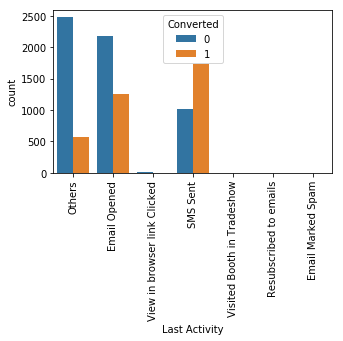

In [39]:
# lets visualize conversion rate against 'Last Activity' column
plt.figure(figsize=(5,3))
sns.countplot(x='Last Activity', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

Conversion rate is higher for clients with SMS Sent as Last Activity.

In [29]:
# lets find the unique values of this series
lead_data['Lead Source'].value_counts()

# we will take 2 actions here - impute null values and replace 'google' with 'Google' since it means the same

# before imputing null values lets figure out the mode of this series. We are imputing the 'mode' here since it is safe to use most used platform.
# it is clear that 'Google' is the mode
lead_data['Lead Source'].mode()

# action - 1 lets impute null values with 'Google'
lead_data['Lead Source'].fillna('Google', inplace=True) 

# action - 2 replace variable 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(to_replace='google', value='Google')

# Also lets replace the insignificant values to 'Random Source'  else dummy variables will be created for these values too.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['welearnblog_Home','Pay per Click Ads','youtubechannel',
                                                            'testone','NC_EDM','WeLearn','blog','Press_Release','Live Chat',
                                                            'Social Media','Click2call','bing','Facebook','Referral Sites'],'Random Source')

# validate the changes & check for null values
lead_data['Lead Source'].isnull().sum()

0

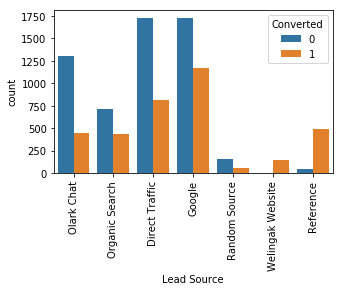

In [41]:
# lets visualize conversion rate against 'Lead Source' column
plt.figure(figsize=(5,3))
sns.countplot(x='Lead Source', hue='Converted', data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

More number of leads are generated through Direct Traffic and Google. But, conversion rate is higher for Sources- 'Welingak Website and through reference'

In [30]:
# let us see the percentage of null values again
(round(100*(lead_data.isnull().sum())/(len(lead_data)),2)).sort_values(ascending=False)

# since the missing values of 'TotalVisits' is less than 2%, lets just drop na.

lead_data.dropna(inplace=True)

# check percentage missing values again
(round(100*(lead_data.isnull().sum())/(len(lead_data)),2)).sort_values(ascending=False)

Last Notable Activity                            0.0
Total Time Spent on Website                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
TotalVisits                                      0.0
Magazine                                         0.0
Converted                                        0.0
Do Not Call                                      0.0
Do Not Email                                     0.0
Lead Source                                      0.0
Lead Origin                                      0.0
Lead Number                                      0.0
Search                                           0.0
Newspaper Article                                0.0
A free copy of Mastering The Interview        

Now our data is ready for further analysis

# Step 3: Data Visualization

### Visualising the numeric variables

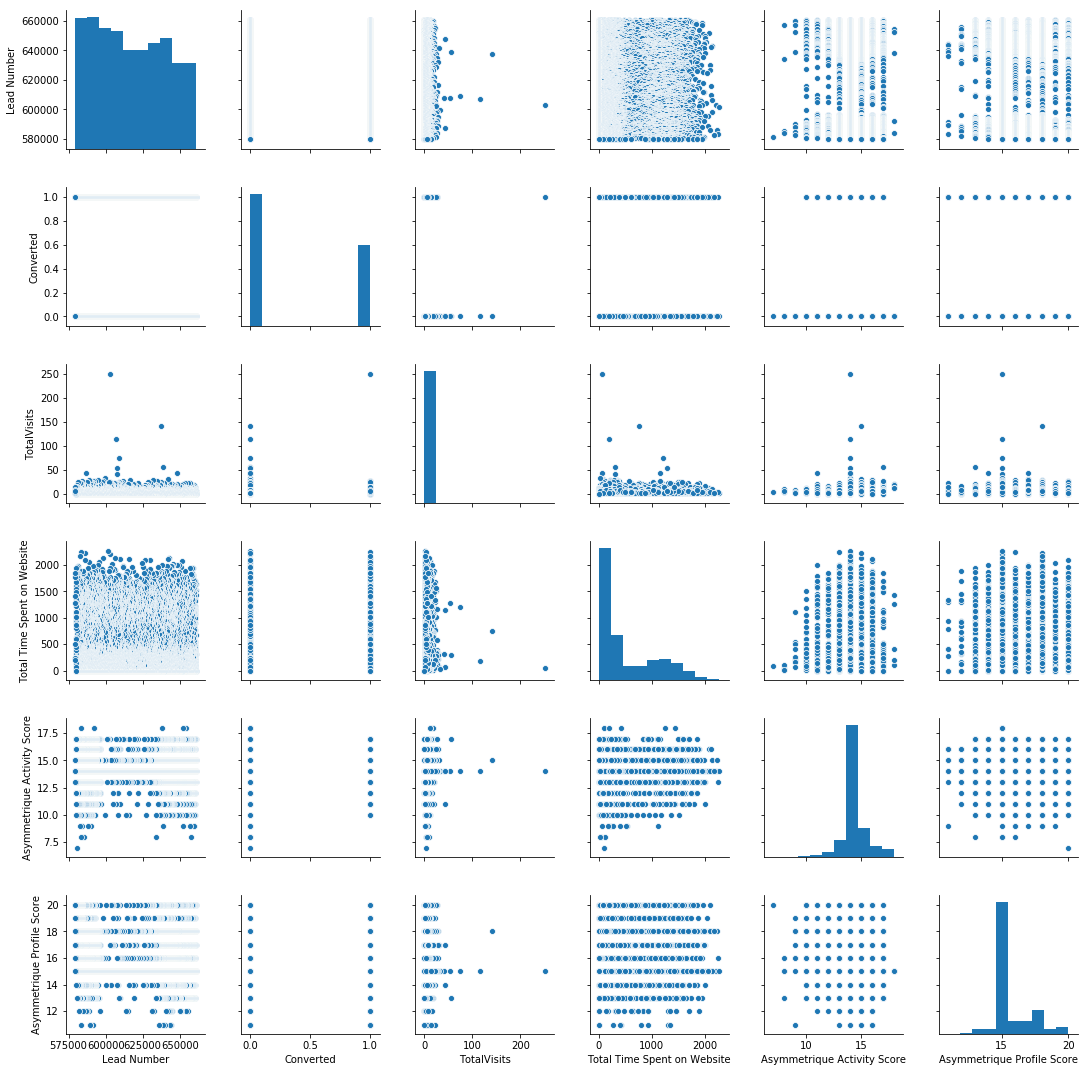

In [43]:
sns.pairplot(lead_data)
plt.show()

No big inference is seen clearly here w.r.t Converted column.

### Visualising categorical variables

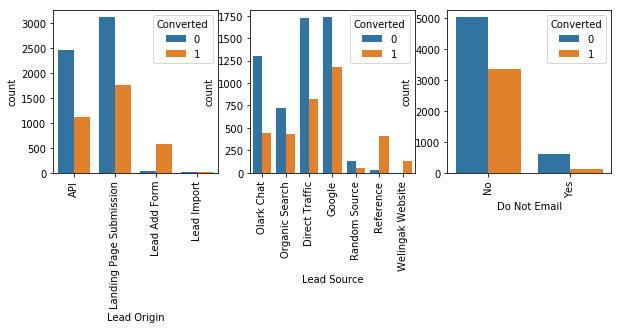

In [44]:
plt.figure (figsize=(10,3))
plt.subplot(1, 3, 1), sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

**Inferences we can make from the below categorical variables against Converted column**

Lead Source - Lead Add Form

Lead Source - Reference, Welingak Website

Do Not Email - Nothing much

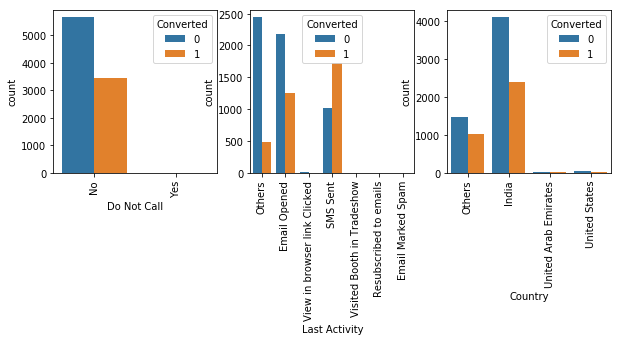

In [45]:
plt.figure (figsize=(10,3))
plt.subplot(1, 3, 1), sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.countplot(x = "Country", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

**Inferences we can make from the below categorical variables against Converted column**

Do Not Call - Nothing much

Last Activity - SMS Sent

Country - Nothing much

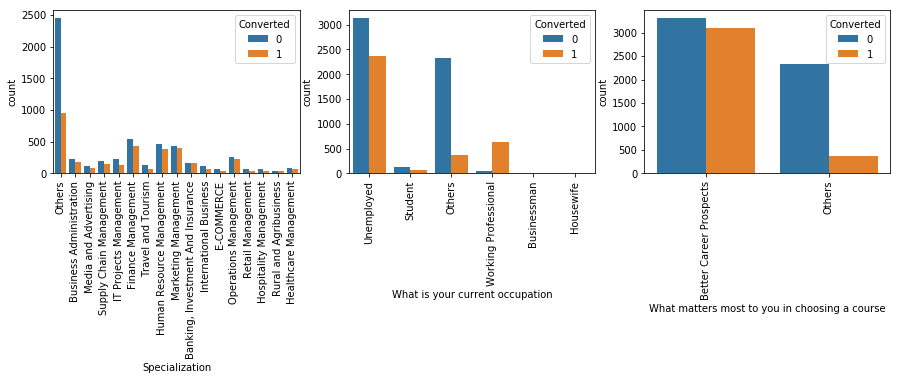

In [46]:
plt.figure (figsize=(15,3))
plt.subplot(1, 3, 1), sns.countplot(x = "Specialization", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

**Inferences we can make from the below categorical variables against Converted column**

Specialization - Nothing much

What is your current occupation - Working Professional

What matters most to you in choosing a course - Nothing much

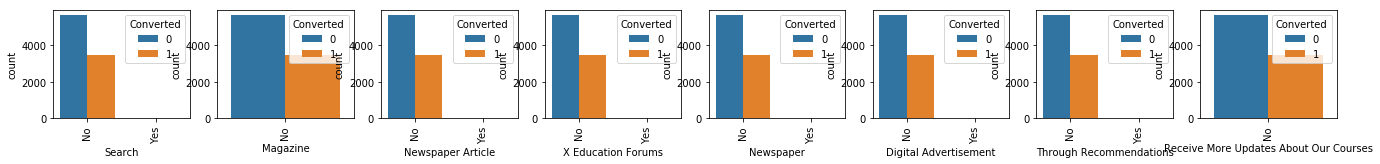

In [47]:
plt.figure (figsize=(23,2))
plt.subplot(1, 8, 1), sns.countplot(x = "Search", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 8, 2), sns.countplot(x = "Magazine", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 8, 3), sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 8, 4), sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 8, 5), sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 8, 6), sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 8, 7), sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 8, 8), sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

Not much inference we are able to make from these variables.

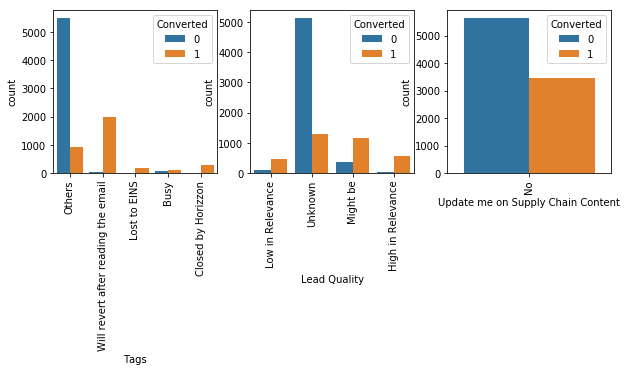

In [48]:
plt.figure (figsize=(10,3))
plt.subplot(1, 3, 1), sns.countplot(x = "Tags", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

**Inferences we can make from the below categorical variables against Converted column**

Tags - Will revert after reading the email, Lost to EINS, Closed by Horizon

Lead Quality - Might be, High in Relevance

Update me on Supply Chain Content - Nothing much

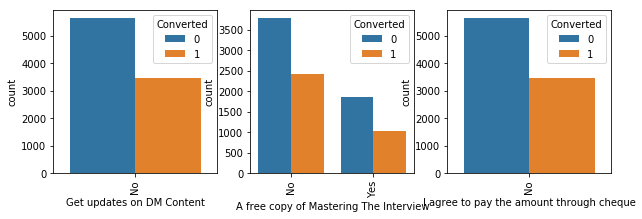

In [49]:
plt.figure (figsize=(10,3))
plt.subplot(1, 3, 1), sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

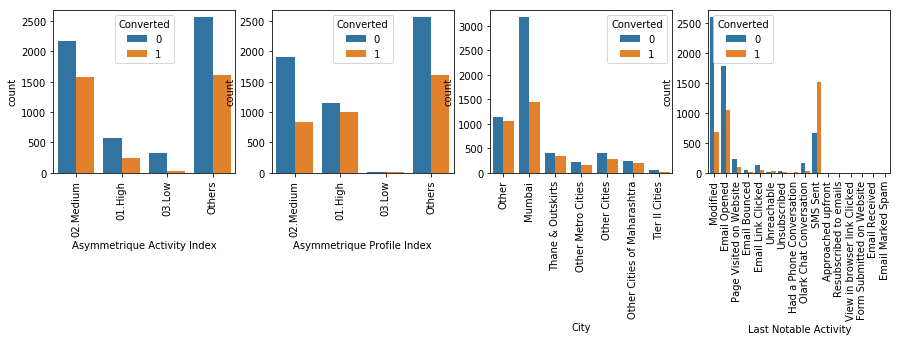

In [50]:
plt.figure (figsize=(15,3))
plt.subplot(1, 4, 1), sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 4, 2), sns.countplot(x = "Asymmetrique Profile Index", hue = "Converted", data = lead_data) , plt.xticks(rotation='vertical')
plt.subplot(1, 4, 3), sns.countplot(x = "City", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.subplot(1, 4, 4), sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data), plt.xticks(rotation='vertical')
plt.show()

Below are some of the inferences we can make from the below categorical variables against Converted column
Inference: 
Asymmetrique Activity Index - Nothing much
Asymmetrique Profile Index - Nothing much
City - Nothing much
Last Notable Activity - SMS Sent

# Step 4: Data Preparation

## Outlier detection

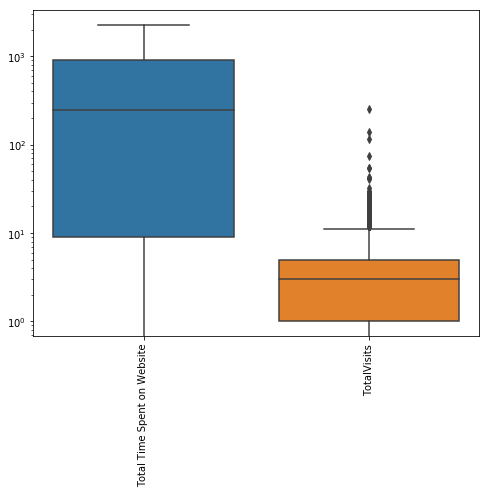

In [51]:
# Checking for outliers in numeric variables

num_cols = ['Total Time Spent on Website', 'TotalVisits']
plt.figure(figsize=(8,6))
sns.boxplot(data=lead_data.loc[:,num_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

## Outlier Removal

In [31]:
# Capping the outlier values which are above 95% with the value at 95% and values below 5% with value at
#5%
outlier_cols = ['Total Time Spent on Website', 'TotalVisits']
for col in outlier_cols:
    percentiles = lead_data[col].quantile([0.05,0.95]).values
    lead_data.loc[lead_data[col] <= percentiles[0],col] = percentiles[0]
    lead_data.loc[lead_data[col] >= percentiles[1],col] = percentiles[1]

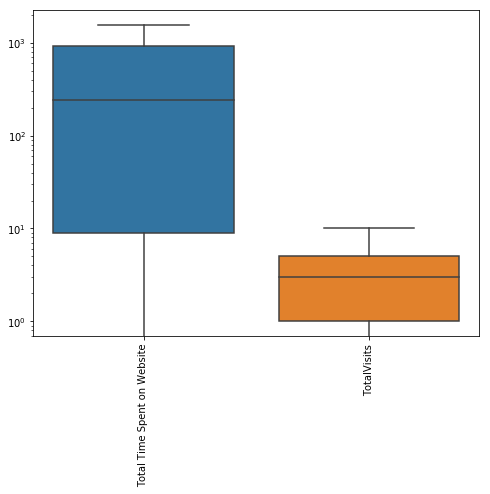

In [53]:
# Checking for outliers in numeric variables

num_cols = ['Total Time Spent on Website', 'TotalVisits']
plt.figure(figsize=(8,6))
sns.boxplot(data=lead_data.loc[:,num_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

In [54]:
# lets check the summary
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.181918,472.956981,14.170713,15.724596
std,23337.138926,0.485464,2.781834,525.890497,1.038942,1.484874
min,579533.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596408.000000,0.000000,1.000000,9.000000,14.000000,15.000000
50%,615278.000000,0.000000,3.000000,244.000000,14.000000,15.000000
75%,637166.000000,1.000000,5.000000,919.500000,14.000000,16.000000
max,660737.000000,1.000000,10.000000,1556.900000,18.000000,20.000000


### Dropping of variables

In [32]:
# Dropping off some variables which do not have any contribution towards conversion from the above
# analysis.

# Making a copy of the dataframe for further analysis
leads_df = lead_data.copy()

# Dropping the variables
leads_df = leads_df.drop(['Lead Number', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content',
                    'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 
                   'Country', 'What matters most to you in choosing a course', 'City', 
                         'Asymmetrique Activity Index' ,'Asymmetrique Profile Index', 
                         'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

# Step 5: Data Standardization

### Creating binary variables

In [33]:
# List of variables to convert to numeric values(0's and 1's)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_toencode = ['Do Not Email', 'Do Not Call']

for col in col_toencode:
    leads_df[col] = le.fit_transform(leads_df[col])

In [57]:
# Checking the data again

leads_df.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0.0,Others,Others,Unemployed,Others,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674.0,Email Opened,Others,Unemployed,Others,Unknown,Email Opened


In [58]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                        9103 non-null object
Lead Origin                        9103 non-null object
Lead Source                        9103 non-null object
Do Not Email                       9103 non-null int32
Do Not Call                        9103 non-null int32
Converted                          9103 non-null int64
TotalVisits                        9103 non-null float64
Total Time Spent on Website        9103 non-null float64
Last Activity                      9103 non-null object
Specialization                     9103 non-null object
What is your current occupation    9103 non-null object
Tags                               9103 non-null object
Lead Quality                       9103 non-null object
Last Notable Activity              9103 non-null object
dtypes: float64(2), int32(2), int64(1), object(9)
memory usage: 995.6+ KB


### Creating dummy variables

In [34]:
# Creating dummy variables for categorical variables

cols_todummy = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 
               'Tags', 'Last Notable Activity', 'Lead Quality', 'Last Activity']

for col in cols_todummy:
    leads_dummy = pd.get_dummies(leads_df[col], prefix = col, drop_first=True)
    leads_df = pd.concat([leads_df, leads_dummy], axis=1)

In [35]:
# Dropping the columns for which dummy variables have been created

for col in cols_todummy:
    leads_df = leads_df.drop(col,axis=1)

In [61]:
# Checking the data again

leads_df.head(2)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Unknown,Last Activity_Email Opened,Last Activity_Others,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


### Visualizing Correlation

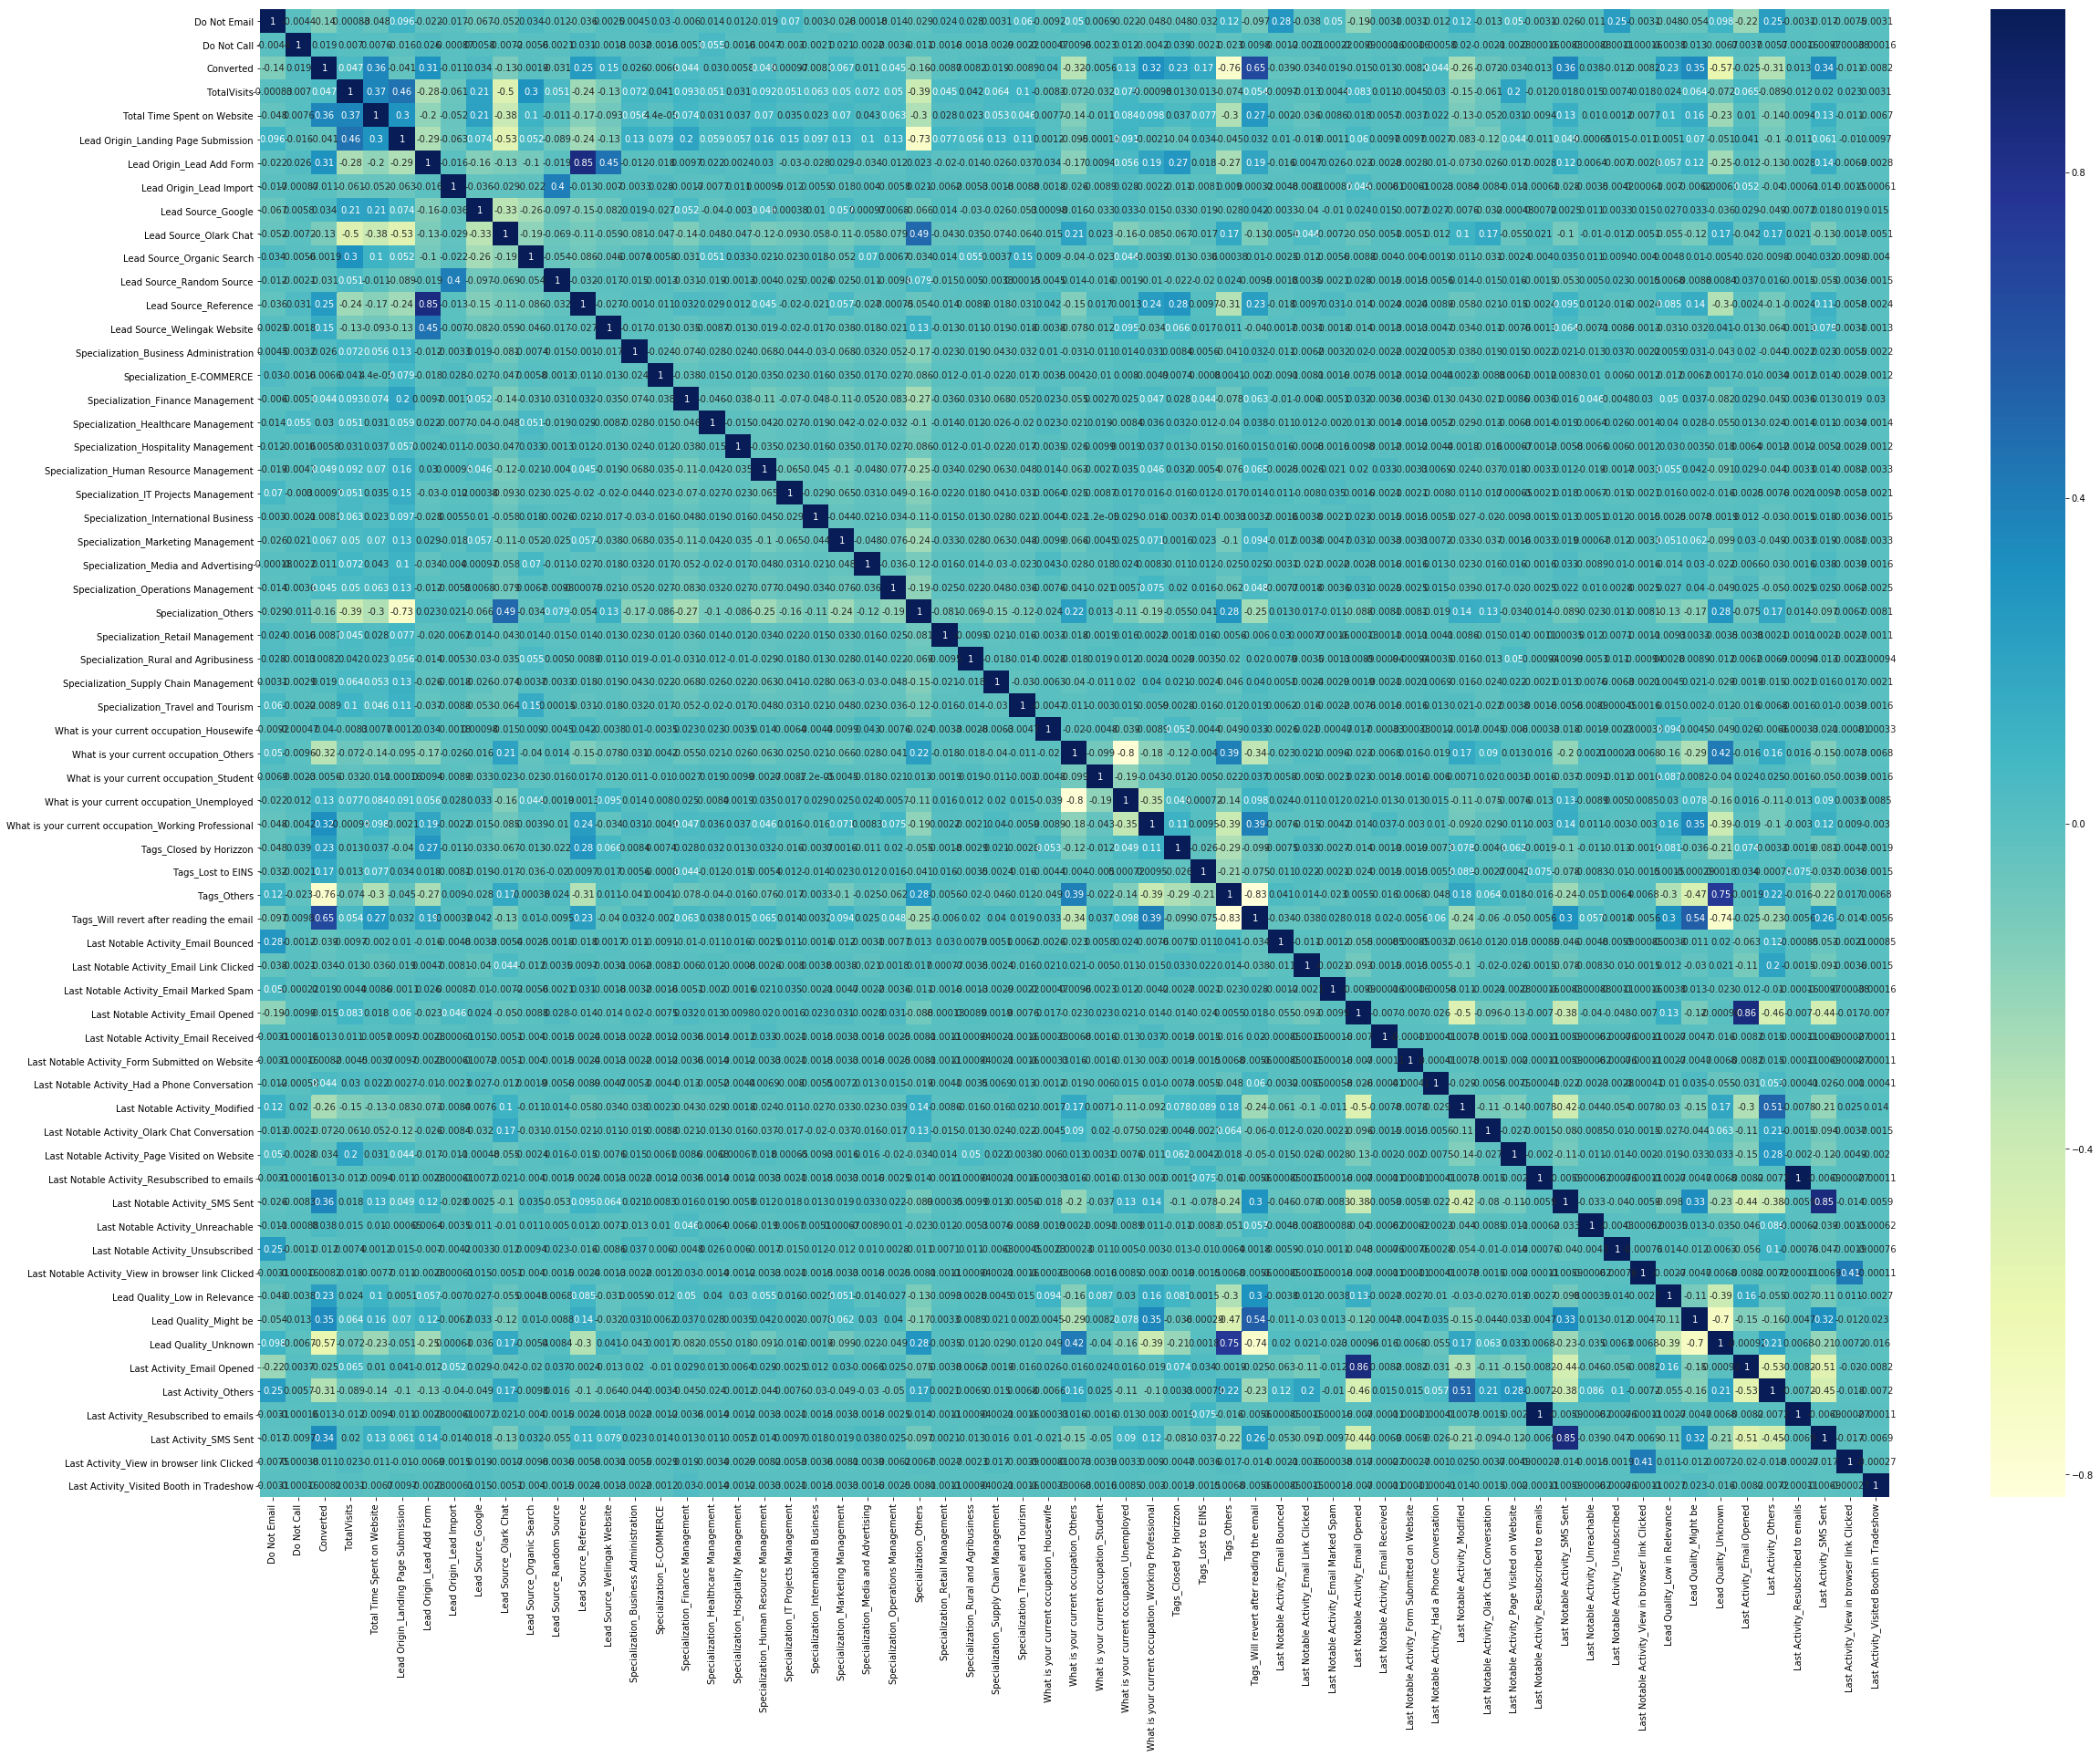

In [62]:
# Checking the correlation coefficients to check which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(leads_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 6: Test-Train Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Putting feature variable to X

X = leads_df.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Unknown,Last Activity_Email Opened,Last Activity_Others,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0.0,0.0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,2.0,1532.0,2.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1.0,305.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,2.0,1428.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [38]:
# Putting response variable to y

y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features

In [40]:
from sklearn.preprocessing import StandardScaler


In [41]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Unknown,Last Activity_Email Opened,Last Activity_Others,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
7962,0,0,-0.068258,1.543291,1.5,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5520,0,0,1.362470,-0.782652,7.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1962,0,0,0.647106,-0.575860,2.5,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1566,0,0,2.435517,1.457918,3.5,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
9170,0,0,-1.141305,-0.896483,0.0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [42]:
# Checking the Conversion rate

converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.02043282434362

# Step 7: Model Building

In [43]:
import statsmodels.api as sm

In [44]:
# Logistic Regression Model

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 28 Nov 2019   Deviance:                          nan
Time:                        15:00:59   Pearson chi2:                 3.05e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.252e+15   5.34e+07   6.09e+07      0.000    3.25e+15    3.25e+15
Do Not Email                                         -2.361e+14   3.57e+06  -6.62e+07      0.000   -2.36e+14   -2.36e+14
Do Not Call                                           2.928e+15   4.78e+07   6.13e+07      0.000    2.93e+15    2.93e+15
TotalVisits                                           1.123e+14   1.39e+06   8.07e+07      0.000    1.12e+14    1.12e+14
Total Time Spent on Website                           2.097e+14   1.03e+06   2.04e+08      0.000     2.1e+14     2.1e+14
Page Views Per Visit                                 -4.734e+13   6.06e+05  -7.82e+07      0.000   -4.73e+13   -4.73e+13
Lead Origin_Landing Page Submission                   -1.25e+14   3.25e+06  -3.85e+07      0.000   -1.25e+14   -1.25e+14
Lead Origin_Lead Add Form                             1.117e+15   1.41e+07   7.93e+07      0.000    1.12e+15    1.12e+15
Lead Origin_Lead Import                               4.298e+14   1.49e+07   2.88e+07      0.000     4.3e+14     4.3e+14
Lead Source_Google                                    8.946e+13   2.41e+06   3.71e+07      0.000    8.95e+13    8.95e+13
Lead Source_Olark Chat                                3.398e+14   3.71e+06   9.16e+07      0.000     3.4e+14     3.4e+14
Lead Source_Organic Search                            7.622e+13   3.18e+06    2.4e+07      0.000    7.62e+13    7.62e+13
Lead Source_Random Source                              7.05e+12   7.05e+06   9.99e+05      0.000    7.05e+12    7.05e+12
Lead Source_Reference                                -1.106e+15   1.47e+07  -7.55e+07      0.000   -1.11e+15   -1.11e+15
Lead Source_Welingak Website                           6.76e+14   1.56e+07   4.33e+07      0.000    6.76e+14    6.76e+14
Specialization_Business Administration               -3.988e+12   6.03e+06  -6.62e+05      0.000   -3.99e+12   -3.99e+12
Specialization_E-COMMERCE                             2.018e+14   8.85e+06   2.28e+07      0.000    2.02e+14    2.02e+14
Specialization_Finance Management                    -1.884e+14    5.1e+06   -3.7e+07      0.000   -1.88e+14   -1.88e+14
Specialization_Healthcare Management                 -1.353e+14   7.77e+06  -1.74e+07      0.000   -1.35e+14   -1.35e+14
Specialization_Hospitality Management                -3.794e+13   8.67e+06  -4.37e+06      0.000   -3.79e+13   -3.79e+13
Specialization_Human Resource Management             -1.724e+14   5.18e+06  -3.33e+07      0.000   -1.72e+14   -1.72e+14
Specialization_IT Projects Management                -1.362e+14   6.14e+06  -2.22e+07      0.000   -1.36e+14   -1.36e+14
Specialization_International Business                -2.898e+14   7.87e+06  -3.68e+07      0.000    -2.9e+14    -2.9e+14
Specialization_M

### Feature Selection using RFE



In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [46]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe.support_

array([False, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False])

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 27),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Random Source', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 23),
 ('Specialization_Healthcare Management', False, 29),
 ('Specialization_Hospitality Management', False, 28),
 ('Specialization_Human Resource Management', False, 30),
 ('Specialization_IT Projects Management', False, 40),
 ('Specialization_International Business', False, 22),
 ('Specialization_Marketing Man

In [49]:
# list of columns selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Lead Quality_Might be', 'Last Activity_SMS Sent'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Random Source',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupat

## Iteration 1:

In [51]:
# Building the model again

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1438.5
Date:                Thu, 28 Nov 2019   Deviance:                       2877.1
Time:                        15:01:32   Pearson chi2:                 7.33e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1030      0.251     -0.411      0.681      -0.594       0.388
Total Time Spent on Website                       1.0507      0.055     19.185      0.000       0.943       1.158
Lead Origin_Landing Page Submission              -0.9322      0.124     -7.522      0.000      -1.175      -0.689
Lead Origin_Lead Add Form                         3.0481      0.957      3.185      0.001       1.172       4.924
Lead Source_Olark Chat                            1.0382      0.159      6.542      0.000       0.727       1.349
Lead Source_Reference                            -2.4620      1.014     -2.428      0.015      -4.450      -0.475
Lead Source_Welingak Website                      2.7821      1.198      2.322      0.020       0.433       5.131
Tags_Closed by Horizzon                           6.1113      0.769      7.943      0.000       4.603       7.619
Tags_Lost to EINS                                 5.6844      0.762      7.457      0.000       4.190       7.178
Tags_Others                                      -1.7607      0.230     -7.666      0.000      -2.211      -1.311
Tags_Will revert after reading the email          4.3736      0.307     14.231      0.000       3.771       4.976
Last Notable Activity_Email Link Clicked         -1.0037      0.423     -2.373      0.018      -1.833      -0.175
Last Notable Activity_Modified                   -1.5473      0.123    -12.563      0.000      -1.789      -1.306
Last Notable Activity_Olark Chat Conversation    -1.5165      0.418     -3.632      0.000      -2.335      -0.698
Lead Quality_Might be                            -1.0419      0.202     -5.159      0.000      -1.438      -0.646
Last Activity_SMS Sent                            1.7113      0.106     16.191      0.000       1.504       1.918
=================================================================================================================
"""

Since all p-values are well within the range, lets try VIF

#### Create VIF

In [52]:
# Create a function for calculation of VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,18.51
4,Lead Source_Reference,14.03
5,Lead Source_Welingak Website,5.11
8,Tags_Others,4.37
1,Lead Origin_Landing Page Submission,3.39
9,Tags_Will revert after reading the email,2.85
3,Lead Source_Olark Chat,2.14
13,Lead Quality_Might be,1.81
11,Last Notable Activity_Modified,1.79
14,Last Activity_SMS Sent,1.71


In [53]:
# Dropping the variable Lead Origin_Lead Add Form as VIF is very high

col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Lead Quality_Might be', 'Last Activity_SMS Sent'],
      dtype='object')

## Iteration 2:

In [54]:
# Building the model again

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1445.4
Date:                Thu, 28 Nov 2019   Deviance:                       2890.7
Time:                        15:01:50   Pearson chi2:                 7.39e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0704      0.250     -0.282      0.778      -0.560       0.420
Total Time Spent on Website                       1.0379      0.054     19.053      0.000       0.931       1.145
Lead Origin_Landing Page Submission              -0.9734      0.123     -7.913      0.000      -1.215      -0.732
Lead Source_Olark Chat                            0.9900      0.157      6.297      0.000       0.682       1.298
Lead Source_Reference                             0.5231      0.369      1.417      0.156      -0.200       1.247
Lead Source_Welingak Website                      5.7733      0.738      7.818      0.000       4.326       7.221
Tags_Closed by Horizzon                           6.1272      0.769      7.963      0.000       4.619       7.635
Tags_Lost to EINS                                 5.7025      0.762      7.483      0.000       4.209       7.196
Tags_Others                                      -1.7508      0.230     -7.627      0.000      -2.201      -1.301
Tags_Will revert after reading the email          4.3933      0.307     14.300      0.000       3.791       4.995
Last Notable Activity_Email Link Clicked         -1.0118      0.423     -2.391      0.017      -1.841      -0.182
Last Notable Activity_Modified                   -1.5505      0.123    -12.611      0.000      -1.791      -1.309
Last Notable Activity_Olark Chat Conversation    -1.5191      0.417     -3.641      0.000      -2.337      -0.701
Lead Quality_Might be                            -1.0503      0.202     -5.208      0.000      -1.446      -0.655
Last Activity_SMS Sent                            1.7250      0.105     16.359      0.000       1.518       1.932
=================================================================================================================
"""

In [55]:
# Dropping the variable Lead Source_Reference as p-value is very high

col = col.drop('Lead Source_Reference', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Lead Quality_Might be', 'Last Activity_SMS Sent'],
      dtype='object')

## Iteration 3:

In [56]:
# Building the model again

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.4
Date:                Thu, 28 Nov 2019   Deviance:                       2892.8
Time:                        15:01:57   Pearson chi2:                 7.59e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0361      0.249     -0.145      0.884      -0.523       0.451
Total Time Spent on Website                       1.0259      0.054     19.055      0.000       0.920       1.131
Lead Origin_Landing Page Submission              -1.0178      0.119     -8.564      0.000      -1.251      -0.785
Lead Source_Olark Chat                            0.9402      0.153      6.152      0.000       0.641       1.240
Lead Source_Welingak Website                      5.7230      0.738      7.759      0.000       4.277       7.169
Tags_Closed by Horizzon                           6.3645      0.756      8.423      0.000       4.883       7.845
Tags_Lost to EINS                                 5.7678      0.762      7.566      0.000       4.274       7.262
Tags_Others                                      -1.7482      0.229     -7.618      0.000      -2.198      -1.298
Tags_Will revert after reading the email          4.4560      0.305     14.629      0.000       3.859       5.053
Last Notable Activity_Email Link Clicked         -1.0146      0.423     -2.397      0.017      -1.844      -0.185
Last Notable Activity_Modified                   -1.5581      0.123    -12.683      0.000      -1.799      -1.317
Last Notable Activity_Olark Chat Conversation    -1.5199      0.418     -3.634      0.000      -2.340      -0.700
Lead Quality_Might be                            -1.0509      0.201     -5.219      0.000      -1.446      -0.656
Last Activity_SMS Sent                            1.7394      0.105     16.572      0.000       1.534       1.945
=================================================================================================================
"""

p-values look good now. Let's try VIF again.

In [57]:
#Create a function for calculation of VIF


vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Others,4.06
1,Lead Origin_Landing Page Submission,2.98
7,Tags_Will revert after reading the email,2.37
2,Lead Source_Olark Chat,1.92
11,Lead Quality_Might be,1.81
9,Last Notable Activity_Modified,1.79
12,Last Activity_SMS Sent,1.69
0,Total Time Spent on Website,1.30
5,Tags_Lost to EINS,1.14
4,Tags_Closed by Horizzon,1.12


We will now remove Tags_Others since the VIF is very high

In [58]:
# Dropping the variable Tags_Others as VIF is very high

col = col.drop('Tags_Others', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Lead Quality_Might be', 'Last Activity_SMS Sent'],
      dtype='object')

## Iteration 4:

In [59]:
# Building the model again

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1475.2
Date:                Thu, 28 Nov 2019   Deviance:                       2950.4
Time:                        15:02:11   Pearson chi2:                 7.70e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7562      0.110    -15.993      0.000      -1.971      -1.541
Total Time Spent on Website                       1.0299      0.053     19.391      0.000       0.926       1.134
Lead Origin_Landing Page Submission              -0.9406      0.117     -8.038      0.000      -1.170      -0.711
Lead Source_Olark Chat                            0.9188      0.152      6.057      0.000       0.621       1.216
Lead Source_Welingak Website                      5.6725      0.738      7.688      0.000       4.226       7.119
Tags_Closed by Horizzon                           8.0480      0.725     11.105      0.000       6.627       9.468
Tags_Lost to EINS                                 7.4103      0.733     10.111      0.000       5.974       8.847
Tags_Will revert after reading the email          6.0706      0.224     27.146      0.000       5.632       6.509
Last Notable Activity_Email Link Clicked         -0.9931      0.422     -2.352      0.019      -1.821      -0.166
Last Notable Activity_Modified                   -1.5623      0.121    -12.876      0.000      -1.800      -1.324
Last Notable Activity_Olark Chat Conversation    -1.5317      0.417     -3.675      0.000      -2.349      -0.715
Lead Quality_Might be                            -0.9831      0.197     -4.979      0.000      -1.370      -0.596
Last Activity_SMS Sent                            1.8004      0.104     17.367      0.000       1.597       2.004
=================================================================================================================
"""

In [60]:
#Create a function for calculation of VIF


vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,1.89
10,Lead Quality_Might be,1.81
1,Lead Origin_Landing Page Submission,1.65
11,Last Activity_SMS Sent,1.58
2,Lead Source_Olark Chat,1.45
8,Last Notable Activity_Modified,1.45
0,Total Time Spent on Website,1.30
9,Last Notable Activity_Olark Chat Conversation,1.07
3,Lead Source_Welingak Website,1.06
4,Tags_Closed by Horizzon,1.05


Now, the model looks good.

**Inference from the above model**

The variables that are most significant in maximising the conversion probbaility are:

* Tags_Closed by Horizzon
* Tags_Lost to EINS
* Last Notable Activity_Email Link Clicked
* Lead Source_Welingak Website

#### Predicted values on the train set

In [61]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10]

7962    0.666636
5520    0.029232
1962    0.045141
1566    0.980009
9170    0.146705
5097    0.146705
8954    0.256636
309     0.878828
5519    0.509923
1050    0.989833
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66663572, 0.02923215, 0.04514125, 0.98000881, 0.14670542,
       0.14670542, 0.25663636, 0.87882826, 0.5099232 , 0.98983267])

In [63]:
# Creating a df with actual converted values and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.666636,7962
1,0,0.029232,5520
2,0,0.045141,1962
3,1,0.980009,1566
4,0,0.146705,9170


In [64]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.666636,7962,1
1,0,0.029232,5520,0
2,0,0.045141,1962,0
3,1,0.980009,1566,1
4,0,0.146705,9170,0


#### Confusion matrix

In [65]:
# Creating the Confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3763  190]
 [ 384 2035]]


In [66]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9099183929692404


In [67]:
# Some more metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8412567176519223

In [69]:
# Let us calculate specificity

TN / float(TN+FP)

0.9519352390589426

In [70]:
# Calculate false positive rate - predicting conversion when customer has not converted

print(FP/ float(TN+FP))

0.048064760941057424


In [71]:
# positive predictive value

print (TP / float(TP+FP))

0.9146067415730337


In [72]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9074029418857005


## Plotting the ROC Curve

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

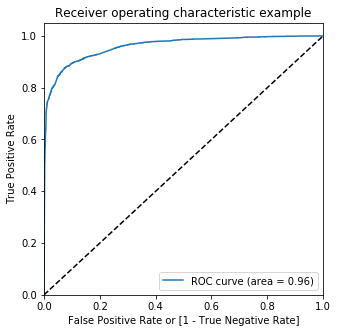

In [75]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The curve is closely following the left-hand border and then top border of the ROC space, also the area under the curve is quite high too. Hence, we can say that the model is quite accurate.

## Finding optimal cutoff point

In [76]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.666636,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.029232,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.045141,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.980009,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.146705,9170,0,1,1,0,0,0,0,0,0,0,0


In [77]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.800691  0.966102  0.699469
0.2   0.2  0.879473  0.911947  0.859600
0.3   0.3  0.900973  0.884663  0.910954
0.4   0.4  0.908663  0.859446  0.938781
0.5   0.5  0.909918  0.841257  0.951935
0.6   0.6  0.904739  0.792063  0.973691
0.7   0.7  0.901287  0.774287  0.979003
0.8   0.8  0.896108  0.745349  0.988363
0.9   0.9  0.882925  0.703597  0.992664


## Sensitivity and Specificity

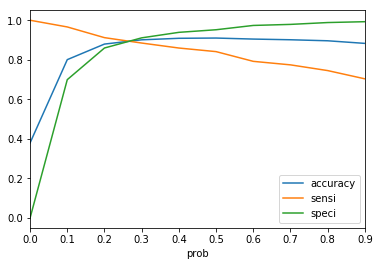

In [78]:
# Let's plot accuracy sensitivity and specificity for different probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## From the above curve, 0.28 looks like optimum point to take as cutoff probability

In [79]:
# Creating the final_predicted column

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.666636,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.029232,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.045141,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.980009,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.146705,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [80]:
# Let's check the overall accuracy again.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.897834274952919

In [81]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3557,  396],
       [ 255, 2164]], dtype=int64)

In [82]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [83]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8945845390657297

In [84]:
# Let us calculate specificity

TN / float(TN+FP)

0.8998229193017961

In [85]:
# Calculate false postive rate - predicting conversion when customer has not converted

print(FP/ float(TN+FP))

0.1001770806982039


In [86]:
# Positive predictive value

print (TP / float(TP+FP))

0.8453125


In [87]:
# Negative predictive value

print (TN / float(TN+ FN))

0.933105981112277


### Precision and Recall

In [88]:
# Let's look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3763,  190],
       [ 384, 2035]], dtype=int64)

### Precision = TP/TP+FP

In [89]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9146067415730337

### Recall = TP/TP+FN

In [90]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8412567176519223

In [91]:
# Let's use sklearn utilities to perform the same operation
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9146067415730337

In [92]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8412567176519223

### Precision and recall trade-off

In [93]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

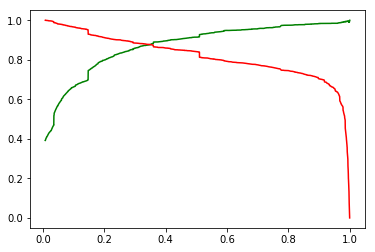

In [94]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the Test set

In [95]:
# Rescaling the test dataset as well.

X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [96]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Lead Quality_Might be,Last Activity_SMS Sent
3504,-0.092079,1,0,0,0,0,0,0,0,0,0,0
4050,-0.896483,0,0,0,0,0,1,0,0,0,0,1
7201,0.454309,1,0,0,0,0,0,0,0,0,1,1
1196,-0.093976,1,0,0,0,0,0,0,0,0,0,0
8219,-0.427880,1,0,0,0,1,0,0,0,0,0,0


In [97]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set

In [98]:
y_test_pred = res4.predict(X_test_sm)

In [99]:
y_test_pred[:10]

3504    0.057779
4050    0.994468
7201    0.195983
1196    0.057673
8219    0.986249
8747    0.146705
9048    0.589656
6524    0.007796
7693    0.177635
8187    0.293371
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3504,0.057779
4050,0.994468
7201,0.195983
1196,0.057673
8219,0.986249


In [101]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [102]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [103]:
# Remove index from both dataframes to append them side by side

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [105]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.057779
1,1,4050,0.994468
2,0,7201,0.195983
3,0,1196,0.057673
4,1,8219,0.986249


In [106]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [107]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [108]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,3504,0,0.057779
1,4050,1,0.994468
2,7201,0,0.195983
3,1196,0,0.057673
4,8219,1,0.986249


In [109]:
# Calculating the final predictions

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [110]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,3504,0,0.057779,0
1,4050,1,0.994468,1
2,7201,0,0.195983,0
3,1196,0,0.057673,0
4,8219,1,0.986249,1


In [111]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8967411204686928

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1520,  169],
       [ 113,  929]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8915547024952015

In [115]:
# Let us calculate specificity

TN / float(TN+FP)

0.8999407933688574

The overall accuracy of the model looks pretty good. The other metrics also point towards a pretty decent model.

## Adding the 'Lead Score' column to the original dataframe

In [116]:
# concatenating conversion_probabilites from both train and test into one

conversion_prob = y_train_pred_final['Conversion_Prob'].append(y_pred_final['Conversion_Prob'])

In [117]:
# Adding 'Lead Score' to the original dataframe

lead_data['Lead Score'] = np.array(conversion_prob) * 100
lead_data['Lead Score'] = round(lead_data['Lead Score'],2)
lead_data.head(4)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0.0,0.0,...,No,Other,02.Medium,02.Medium,15.0,15.0,No,No,Modified,66.66
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674.0,2.5,...,No,Other,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,2.92
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,...,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,4.51
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,...,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,98.00


In [118]:
# Sorting the dataframe by descending order of Lead Score to get the clients with maximum conversion
# probability at the top i.e. Hot clients

lead_data.loc[:,['Lead Number', 'Lead Score']].sort_values(by=['Lead Score'], ascending=False).head()

,Lead Number,Lead Score
6895,596694,100.0
8345,586167,100.0
9153,580275,100.0
5088,611068,100.0
6266,601761,100.0


In [119]:
# Taking 80% as the cut-off lead score to become eligible for being a hot lead

hot_leads = lead_data.loc[lead_data['Lead Score'] >= 80,['Lead Number', 'Lead Score']].sort_values(by=['Lead Score'], ascending=False)
hot_leads.head()

,Lead Number,Lead Score
7006,595872,100.0
2986,631255,100.0
2047,639874,100.0
6895,596694,100.0
4646,615172,100.0


So, these are the leads who have maximum probability of getting converted i.e. they are the Hot leads and the company should invest more time and efforts in getting them converted.

In [120]:
hot_leads.shape

(2641, 2)